# **Exploring Top Restaurants in Las Vegas: A Data Science Journey!**



## **Background:**
As we gear up for our summer trip to Las Vegas, we've decided to delve into the city's vibrant dining scene. To ensure we experience the best and most budget-friendly eateries, we've utilized the [Yelp dataset](https://business.yelp.com/data/resources/open-dataset/) to identify top-rated restaurants in Las Vegas. We've also filtered out the top 50 fast-food chains to avoid the usual options and embrace more unique culinary experiences.​

### **Project Goal/Stakes:**
Our objective is to analyze the Yelp dataset to pinpoint exceptional yet affordable dining establishments in Las Vegas. By focusing on local favorites and hidden gems, we aim to curate a list of restaurants that offer both quality and value, ensuring our trip is both delicious and economical.​

### **Project Submission:**
A Note from your Backpacking Partner:

"Hello, team. I've gathered and preprocessed the Yelp dataset for Las Vegas, filtering out the top 50 fast-food chains to ensure we explore the city's unique culinary offerings. Now, it's up to you to analyze this data and find the best budget-friendly restaurants for our trip. I request that you do NOT delete/modify any part of the question description, given code, and pre-loaded comments in the code block.

We look forward to your insightful analyses and recommendations for our culinary adventure in Las Vegas! Hope we can have a wonderful trip in Vegas."


Just a reminder, for a better a smooth autograder experience, please:
- Write your answers between <font color='green'>`# ANSWER STARTING HERE`</font> and <font color='green'>`# ANSWER ENDS HERE`</font>.
- Do not delete helper cells
- Always use `seed=42` as your `random_state` in the whole notebook.

Submit this Google Colab/Jupyter Notebook file on Gradescope. Cheers!🥂


### **Part A (4 Pts Total)**

#### You are expected to load the Yelp data and provide some metrics so I know what we are working with. Follow these steps.

##### ***1.1 Import Libraries (0 pt)***

---


Many libraries are imported for you. Import the additional **Sci-kit learn**  modules:
- **Decision Tree Classifier**
- **K Neighbors Classifier**
- **Logistic Regression**
- **Random Forest Classifier**

In [13]:
# Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Add the classifiers to the imports here:
# ANSWER STARTING HERE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ANSWER ENDS HERE


##### ***1.2 Understanding the Dataset (1 pt)***

---


1. Load the dataset to a dataframe named `yelp_data`.
2. Print the dimensions of the dataset.
3. Print the column names of the dataframe.

In [14]:
# Load the yelp dataset
# ANSWER STARTING HERE
yelp_data = pd.read_csv('yelp_datasets.csv')
print(yelp_data.shape)
for name in yelp_data.columns:
    print(name, end=', ')

# ANSWER ENDS HERE

(213175, 20)
business_id, name, neighborhood, address, city, state, postal_code, latitude, longitude, business_stars, review_count, categories, checkins, review_id, user_id, reviewer_stars, text, useful, funny, cool, 

In [15]:
yelp_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,business_stars,review_count,categories,checkins,review_id,user_id,reviewer_stars,text,useful,funny,cool
0,n7V4cD-KqqE3OXk0irJTyA,GameWorks,Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0,HVeoYQNl-O1ufTwkHLgtsg,_btJkKpbtg2CqkCuOXWfKw,5.0,"Dante is the man. Knowledgeable, helpful, and ...",2.0,0.0,1
1,n7V4cD-KqqE3OXk0irJTyA,GameWorks,Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0,lBeOyeZDLUMTaCskqE29cg,YMgZqBUAddmFErxLtCfK_w,4.0,I was honestly surprised at how much fun we ha...,1.0,2.0,3
2,n7V4cD-KqqE3OXk0irJTyA,GameWorks,Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0,x6iUawdyECs-H2zP3Sw66g,l3GGDxk-i4eFQOd8NiwHTQ,3.0,"You can go through $100 here in no time, the g...",1.0,0.0,0
3,n7V4cD-KqqE3OXk0irJTyA,GameWorks,Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0,7LFmxVGe6WfAkW_FiK_NzQ,w0hQcoxd-DwIR9s0f5pP0w,2.0,The arcade in Gameworks has a lot of variety i...,7.0,0.0,0
4,n7V4cD-KqqE3OXk0irJTyA,GameWorks,Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0,ztMzyQSQBHJ9HAfWSUgrUw,63YdlT2QdwTpp62w5RHR0Q,3.0,"Great place,\nBut if you are vegan and looking...",0.0,1.0,0


##### ***1.3 Explore the Data (3 pts)***

---


Let's see what is stored in the dataset first to get a feel for what we can expect. Write only a **single line** of code for each.
1. Print the number of **samples** in the dataset (a numerical value).
2. Print the number of **features** in the dataset (a numerical value)
3. **Create two lists of the unique business names and categories**, named `names` and `categories`, respectively.

Your answer should be similar to:
- Business: ["GameWorks", "Divine Cafe", "Trattoria Italia", "Water", ...]
- Rarities: ["Standard", "Mythic", "Legendary", "Ultra-Beast"]


In [16]:
# Print the number of samples
# ANSWER STARTING HERE
print(yelp_data.shape[0])

# ANSWER ENDS HERE

# Print the number of features
# ANSWER STARTING HERE
print(yelp_data.shape[1])

# ANSWER ENDS HERE

# Write code to get your two lists.
# ANSWER STARTING HERE
names = yelp_data['name'].unique().tolist()

categories= yelp_data['categories'].unique().tolist()

# ANSWER ENDS HERE

print("Business:", names)
print(len(names))
print("Categories:", categories)
print(len(categories))


213175
20
Business: ['GameWorks', 'Divine Cafe at the Springs Preserve', 'Trattoria Italia', 'Del Mar Deli', 'Mexicali Raspados', 'The Hummus Factory', 'Sierra Gold', 'Bayside Buffet at Mandalay Bay', "Roberto's Taco Shop", "Roxy's Diner", 'Sushi Loca', 'Tilted Kilt Pub & Eatery', 'Gordon Biersch Brewery Restaurant', 'Cafe Rio', 'Nobu', 'Dona Maria Tamales Restaurant', 'Buddha Thai Bistro', 'Tequila Taqueria', 'La Parrilla', "Grimaldi's Pizzeria", 'The Black Sheep', 'Kyara Japanese Tapas', 'The Chicken Shack', 'Krispy Kreme Doughnuts', 'Fat Bar', 'Plumeria Thai Cafe', 'Pokeman', "Mulligan's Pub", 'TENDER Steak & Seafood', 'Waffles Cafe', 'Gyro Time Restaurant', 'Chubby Cattle', "Green Leaf's & Bananas", 'Rivas Mexican Grill #2', 'Hot Dog On A Stick', 'Mimosas Gourmet', 'Amlee Chinese Cuisine', 'Blueberry Hill Family Restaurant', 'Cicis', 'China Star', "Pancho's Vegan Tacos", 'Greens and Proteins', 'Marias Taco Shop', 'Little Caesars Pizza', 'Claim Jumper', 'Gold Mine Bar & Grill', 'Buf

### **Part B (9 Pts Total)**

#### Now we need to do some scraping of the dataset so you can feed it into the training model.

##### ***2.1 Preprocessing (3 pts)***

---
Before training the model, we need to clean and prepare the data. Please do the following.
1. Print the number of missing data in each column. Please specify which column name you got the number from. You can create a dictionary `missing_data`.
2. Handle the missing values in the `yelp_data` dataset the best way you can think of. Save the processed file as `yelp_data`.

*Suggestions:* Fill in empty with 0s, or do some type of imputation technique such as fill in the empty data with the most common or average of data in that column, etc.

In [17]:
# Print the number of missing data in each column.
# ANSWER STARTING HERE
missing_data = {}
for cat in yelp_data.columns:
    missing_data[cat] = yelp_data[cat].isna().sum()
print(missing_data)

# ANSWER ENDS HERE


# Write a code that handles missing values in the dataset by discarding them
# ANSWER STARTING HERE

fixed_revstars = yelp_data['reviewer_stars'].fillna(yelp_data['reviewer_stars'].mean())
yelp_data['reviewer_stars'] = fixed_revstars

fixed_useful = yelp_data['useful'].fillna(yelp_data['useful'].mean())
yelp_data['useful'] = fixed_useful

fixed_funny = yelp_data['funny'].fillna(yelp_data['funny'].mean())
yelp_data['funny'] = fixed_funny

# ANSWER ENDS HERE

{'business_id': 0, 'name': 0, 'neighborhood': 0, 'address': 0, 'city': 0, 'state': 0, 'postal_code': 0, 'latitude': 0, 'longitude': 0, 'business_stars': 0, 'review_count': 0, 'categories': 0, 'checkins': 0, 'review_id': 0, 'user_id': 0, 'reviewer_stars': 4629, 'text': 0, 'useful': 4670, 'funny': 4504, 'cool': 0}


##### ***2.2 Splitting, Training, and Testing (6 pts)***

---

Typically in machine learning, we wish to split the data into various portions in order to let a machine learning model train itself on one part of the data and test itself on another part of the data. Splitting also helps prevent overfitting, ensuring the model can make accurate predictions on new, unseen data.

Training data is used to learn the model, while testing data assesses its generalization to unseen examples. I would recommend using **80%** of the data  for training and **20%** for testing.

Before we split the data, we are going to help you process the raw data a little bit more:
 1. We prefer restaurants close to Canyon Gate in Las Vegas, near our AirBnb.
 2. We add a `preference_rating` column at the end of the dataframe, so that we can predict the rating classification.
 3. We add non-linearity to `preference_rating`

In [18]:
# Helper Function, Do Not Remove
import numpy as np
import pandas as pd
import hashlib
from sklearn.preprocessing import MinMaxScaler

def business_id_to_float(business_id):
    hash_object = hashlib.md5(business_id.encode())
    hash_hex = hash_object.hexdigest()
    hash_int = int(hash_hex[:8], 16)
    return hash_int / (2**32 - 1)

def float_to_business_id(unique_float, original_business_ids):
    id_to_float = {id: business_id_to_float(id) for id in original_business_ids}
    closest_id = min(id_to_float.keys(), key=lambda x: abs(id_to_float[x] - unique_float))
    return closest_id

# Non-linear transformation functions
def apply_non_linear_transformation(x, steepness=5):
    """
    Apply a sigmoid-like non-linear transformation
    - Increases sensitivity around mid-range values
    - Compresses extreme values
    """
    return 1 / (1 + np.exp(-steepness * (x - 0.5))) * 10

def exponential_boost(x, base=2):
    """
    Apply exponential boosting to favor higher values
    """
    return np.power(x, base)

def angular_score_adjustment(x):
    """
    Use trigonometric function to add non-linear variation
    """
    return np.sin(np.pi * x / 2) * 10

# Define weights
weights = {
    'location_score': 0.25,
    'business_stars': 0.25,
    'reviewer_stars': 0.25,
    'engagement_score': 0.25
}

# Define the target location as Canyon Gate, Las Vegas
target_location = (36.1433, -115.2821)

# Haversine distance calculation
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Main processing function
def generate_preference_rating(yelp_data):
    # Calculate distance from target location
    yelp_data['distance_km'] = yelp_data.apply(
        lambda row: haversine(target_location[0], target_location[1],
                               row['latitude'], row['longitude']), axis=1
    )

    # Normalize distance to [0, 1] and invert (closer is better)
    scaler = MinMaxScaler()
    yelp_data['location_score'] = 1 - scaler.fit_transform(yelp_data[['distance_km']])

    # Normalize business_stars and reviewer_stars to [0, 1]
    yelp_data['business_stars_norm'] = yelp_data['business_stars'] / 5
    yelp_data['reviewer_stars_norm'] = yelp_data['reviewer_stars'] / 5

    # Calculate engagement_score and normalize
    yelp_data['engagement_score_raw'] = yelp_data['useful'] + yelp_data['funny'] + yelp_data['cool']
    yelp_data['engagement_score'] = scaler.fit_transform(yelp_data[['engagement_score_raw']])

    # Calculate preference_rating with non-linear transformations
    yelp_data['preference_rating'] = (
        weights['location_score'] * apply_non_linear_transformation(yelp_data['location_score']) +
        weights['business_stars'] * exponential_boost(yelp_data['business_stars_norm']) +
        weights['reviewer_stars'] * angular_score_adjustment(yelp_data['reviewer_stars_norm']) +
        weights['engagement_score'] * np.log1p(yelp_data['engagement_score'])
    )

    # Normalize the preference_rating to 1-10 scale
    rating_scaler = MinMaxScaler(feature_range=(1, 10))
    yelp_data['preference_rating'] = rating_scaler.fit_transform(
        yelp_data[['preference_rating']]
    ).round().astype(int)

    # Convert business_id to float
    yelp_data['business_id'] = yelp_data['business_id'].apply(business_id_to_float)

    return yelp_data

# Data preparation and display
def prepare_final_ranking(yelp_data):
    # Remove duplicates, keeping highest-rated business for each name
    unique_data = yelp_data.sort_values(by='preference_rating', ascending=False).drop_duplicates(subset='name', keep='first')

    # Create ranked dataframe
    ranked_yelp = unique_data[['name', 'preference_rating']].sort_values(by='preference_rating', ascending=False)

    return ranked_yelp

# Process the data
yelp_data = generate_preference_rating(yelp_data)

# Prepare and display ranking
ranked_results = prepare_final_ranking(yelp_data)
print(ranked_results)


                                   name  preference_rating
190916            Yojié Japanese Fondue                 10
172314              La Maison de Maggie                 10
73346   Paradise Place Jamaican Cuisine                 10
62156       Macayo's Mexican Restaurant                 10
73686                 Porchlight Grille                 10
...                                 ...                ...
201088                      Crispy Town                  3
211585           A Cut Above Restaurant                  3
51148                         Home Turf                  3
70895                  Arandas Taqueria                  2
7403     La Tapenade Mediterranean Cafe                  2

[1808 rows x 2 columns]


Using every feature as input to the training process is not a good idea. Some features are not related to business rating, so let's exclude them from our feature set.
1. Extract the following for the input data `X`: `business_stars`,`review_count`,`checkins`,`reviewer_stars`,`useful`,`funny`, and `cool`.
2. Store the label variable in `Y`.

Let the criteria for a good resturant be a rating greater than **eight**.

In [19]:
# Initialize X and Y
# ANSWER STARTING HERE

X = yelp_data[['business_stars', 'reviewer_stars', 'useful', 'funny', 'cool', 'review_count', 'checkins']]
Y = (yelp_data['preference_rating'] > 8).astype(int)

# ANSWER ENDS HERE

3. Use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from the Scikit-learn module to split the training data using the proposed 80/20 ratio.

In [20]:
seed = 42 # always use this seed number as your random_state in the whole notebook
test_size=0.2

# Split your training data and use the seed to get consistent results.
# ANSWER STARTING HERE

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# ANSWER ENDS HERE

4. **Normalize** both the training and test sets so that the model is trained on features with a consistent scale. **You can use any scaler from the Scikit-learn module to do this.** If we don't normalize the data, the model may struggle to converge during training because some features could dominate the loss function due to their larger scale. By normalizing the data, we ensure that each feature contributes equally to the learning process, improving the model's ability to find an optimal solution. (eg. [StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

In [21]:
# ANSWER STARTING HERE

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANSWER ENDS HERE


### **Part C (15 Pts Total)**

#### This is going to be the main source of evaluation for the return offer. Be thorough with your model search. You will train a **Logistic Regression (max_iter=1000)** Model, and 3 different classifiers: **KNN**, **DecisionTree**, and **Random Forest**.

##### ***3.1 Load Models (4 pts)***

---

1. Create a python dictionary named `models` that maps the names of the models to their constructors.

In [22]:
# Initialize the models
# ANSWER STARTING HERE
models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'DecTree': DecisionTreeClassifier(),
    'RandForest': RandomForestClassifier()
         }

# ANSWER ENDS HERE



##### ***3.2 K-fold Cross-Validation (8 pts)***
Using the standardized feature sets, do the following:
1. Given five folds and the object with the specified number of splits, perform **k-folds cross-validation** for **each** model using StratifiedKFold.
2. Print the **name** of the model and **cross validation accuracy** (mean and standard deviation) for each.

[Cross Validation Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [23]:
# Perform k-fold Cross-Validation for each model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

for model_name, model in models.items():
    np.random.seed(42)
    # ANSWER STARTING HERE

    scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    print(f'{model_name}: mean={scores.mean()} std={scores.std()}')

    # ANSWER ENDS HERE


LogReg: mean=0.8692975255072124 std=0.0003907196258697584
KNN: mean=0.9224522106250733 std=0.0007723665927242353
DecTree: mean=0.9885598686525154 std=0.0002304079125646697
RandForest: mean=0.9702650404597162 std=0.0007939668223566727


##### ***3.3 Question: What is the most accurate ML model from above choice? Why? (3 pts)***
ANSWER STARTING HERE

The most accurate model we used was the Decision Tree model. This is because it's mean accuracy among the 5 folds was the highest at .989. The standard deviation is also the smallest of the group, at .0002. A low standard deviation is good because it means the model predicts very consistently with different folds.

### **Part D (12 Pts Total)**
#### We wants you to deploy of all the models to production. Evaluate all of the models on the heldout test set.

##### ***4.1 Model Evaluation (6 pts)***

---


For each of the models do the following in order to evaluate each of them properly:
- **Train** each of the models
- Print each of the **accuracies** (3 decimal precision) of the models by their **names** in this format: *Accuracy of (model name): (accuracy of the model)*.
- Print a **classification report** with the accuracy, precision, recall and f1-score of each model.

In [24]:
# Train each model using the training data
for model_name, model in models.items():
    # Set random seed for reproducibility
    np.random.seed(42)
    #ANSWER STARTING HERE
    model.fit(X_train_scaled, y_train)

    # ANSWER ENDS HERE

# Evaluate the performance of each model
for model_name, model in models.items():
    np.random.seed(42)

    #ANSWER STARTING HERE
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of {model_name}: {accuracy:.3f}") # Your accuracy table header here
    print(classification_report(y_test, y_pred)) # Implement your classification report here
    # ANSWER ENDS HERE


Accuracy of LogReg: 0.871
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     37132
           1       0.51      0.08      0.13      5503

    accuracy                           0.87     42635
   macro avg       0.70      0.53      0.53     42635
weighted avg       0.83      0.87      0.83     42635

Accuracy of KNN: 0.935
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     37132
           1       0.77      0.70      0.73      5503

    accuracy                           0.93     42635
   macro avg       0.86      0.84      0.85     42635
weighted avg       0.93      0.93      0.93     42635

Accuracy of DecTree: 0.990
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     37132
           1       0.97      0.96      0.96      5503

    accuracy                           0.99     42635
   macro avg       0.98      0.98      0.98     4263

##### ***4.2 Model Interpretation (6 pts)***

---

- **Interpret** the results of the classification models (list the models which got the best scores for Accuracy, Precision, Recall and F1 score).
- **Recommend the best model according to your analysis.** Hopefully your best model has over a 90% accuracy as this will guarantee your return offer.

**Question: Which model according to your analysis was the best at predicting the Resturant Preference Rating? Why? DO NOT just say that the accuracy is better than the rest of the models. That is obvious.**

ANSWER STARTING HERE
After trials with all four of our models, Decision Tree shines through with an accuracy of .990! It had higher scores for precision, recall, and f1 than any other model. Random Forest was a close second with an average accuracy of .978. The other models, Linear Regression and K-Neighbor, had lower accuracies with .871 and .935 respectively. These are still pretty good, but dont come close to the Decision Tree model.

The difference in accuracies is of course due to the differences in how these models factor in features and make their predictions. Decision trees are very good at modeling non-linear relationships between features and also do well when the data has a clear numerical decision threshold, which is exactly what our binary output is defined by. Linear Regression did really bad because it assumes linearity, when our data's relationships are not fully linear. KNN isnt as good as decision trees are at learning patterns and tends to be more affected by less relevant features, which could explain the slight lack in accuracy. A Random Forest is typically more robust and better for more complicated predictions than a single decision tree, but in this case the data is relatively simple, so a decision tree is already enough to get it really accurate. Taking the average of a bunch of trees, which is what the Forest does, results in a slightly more conservative decision per prediciton.

### **Part E (5 Pts Total)**

#### Seeing all the effort and hard work, it looks as if most people have done well with this project🎉! With all the input features you have used, there is still no concrete way of figuring out whether a feature is more important than another. We only really used intuition for that. Thus, we shall do some feature engineering to determine this.

##### ***5.1 What are your top 4 features used to predict Our resturant preference rating (5 pts)?***
- Use Random Forest to create a dataframe for **feature importance** named **feature_importance_df**.
- **Extract**, **Sort**, and **Print** the **top 4** features from that dataframe.

Here are some references to help you:

[Feature Importance 1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

[Feature Importance 2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_)



In [25]:
# Extract the feature importances from the most accurate model
# ANSWER STARTING HERE
importances = models['RandForest'].feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Displaying feature importances
display(feature_importance_df.head(4))

# ANSWER ENDS HERE


,Importance
review_count,0.625944
checkins,0.142210
reviewer_stars,0.085522
business_stars,0.068186


### Part F (14 Points Total)

#Now you'll learn about clustering techniques!

You'll perform data preprocessing, apply dimensionality reduction technique, and use K-means clustering to analyze the data. Finally, you'll visualize the results.



##### ***6.1.1 Elbow Method (2.5 pts)***

In K-Means clustering, we start by randomly initializing k clusters and iteratively adjusting these clusters until they stabilize at an equilibrium point. However, before we can do this, we need to decide how many clusters (k) we should use.

In this part, you will determine the optimal number of clusters for a given dataset using the **Elbow Method**. The goal is to identify the point where adding more clusters results in minimal improvement in clustering quality, known as the "elbow point."

The *distortion* for a given number of clusters $k$ can be represented as:



$$D(k) = \frac{1}{N} \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$$

Where:
- $D(k)$ is the distortion for $k$ clusters
- $k$ is the number of clusters
- $C_i$ represents the $i$-th cluster
- $x$ is each data point in the cluster
- $\mu_i$ is the centroid (mean) of the $i$-th cluster
- $\|\cdot\|$ denotes the Euclidean distance


In the Elbow Method, the Inertia is a measure of the sum of squared distances between data points and their respective cluster centers. It's often used to evaluate the compactness of clusters and is defined as:

$$I(k) = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$$


Task A: Implement your own distortion function to determine the different numbers of clusters, ranging from 1 to 10. Plot the elbow plot and guess the elbow point $k$. Use X_Train that we calculated in the previous parts for this part.

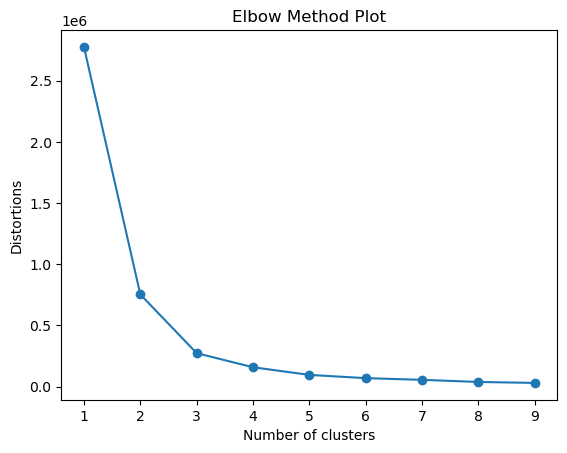

In [26]:
distortions = []
inertias = []
K = range(1, 10)

for k in K:
    # ANSWER STARTING HERE
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    distortions.append(kmeans.inertia_ / len(X_train_scaled))

plt.plot(K, distortions, marker='o')
plt.title('Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()
# ANSWER ENDS HERE

To determine the optimal number of clusters, we have to select the value of $k$ at the “elbow”, i.e. the point after which the distortion starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.


In [27]:
k_cluster = 3

##### ***6.1.2 KElbowVisualizer (2.5 pts)***
Task B: Use the `KElbowVisualizer` from the `yellowbrick` library to verify the conclusion above. See [Elbow Method
](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.cluster import KElbowVisualizer

# ANSWER STARTING HERE
# Load the dataset
X = X_train
# Instantiate the clustering model and visualizer
kmeans = KMeans(n_clusters=k_cluster, random_state=seed)
#viz = KElbowVisualizer(kmeans, k=(1, 10))
#viz.fit(X)
#viz.show()

# ANSWER ENDS HERE


##### ***6.1.3 Question: According to the plots above, why do you think we chose K=3? (1 pts)***

ANSWER STARTING HERE After analyzing both plots, it looks like there might be a couple visible reasons why we might choose 3 for k. In both graphs in general, 3 does appear to be the "elbow" point that we are looking for when we use this method. This is because the points before three are decreasing nonlinearly, but after 3 the rest of the points converge to a much more linear looking slope (at least visually). 

With more detail in the yellowbrick visualizer, we observe that the fit time and distortion score invert right before 3. Also, if you were to sum up the fit time and the distortion score, 3 would have the lowest total, which is really interesting. To summarize, it looks like k=3 is the best combination of distortion and fit time.

##### ***6.2.1 Extract top features (1 pts)***
Extract the top 4 features you defined in Part E for show its clustering for the following steps. Name your feature dataframe `X`.


In [47]:
# TODO: Select most relevant features for clustering (exclude 'rating')
data = yelp_data

# ANSWER STARTING HERE
features = ['review_count', 'checkins', 'reviewer_stars', 'business_stars']
X = pd.DataFrame(data[features])
# ANSWER ENDS HERE

print(X)

        review_count  checkins  reviewer_stars  business_stars
0                349       3.0             5.0             3.0
1                349       3.0             4.0             3.0
2                349       3.0             3.0             3.0
3                349       3.0             2.0             3.0
4                349       3.0             3.0             3.0
...              ...       ...             ...             ...
213170           245       1.0             3.0             4.5
213171           245       1.0             5.0             4.5
213172           245       1.0             3.0             4.5
213173           245       1.0             5.0             4.5
213174           245       1.0             5.0             4.5

[213175 rows x 4 columns]


We wish to standardize the feature sets in order to make sure that the PCA is not biased by differences in scales within the data. Standardization aids with consistency in the data.

##### ***6.2.2 Normalize the data using StandardScaler. (1 pts)***

- **Standardize** the features and save it as `X_scaled`.

*Hint:* [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [50]:
# TODO: Normalize the data using StandardScaler
# ANSWER STARTING HERE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# ANSWER ENDS HERE


There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. By reducing the number of features, we are improving the performance of our algorithm. In addition, by decreasing the number of features the noise is also reduced.

#### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that finds directions (principal components) maximizing variance in a dataset. It's an orthogonal linear transformation mapping data to a new coordinate system [1].

PCA steps for a dataset $X$ with $n$ samples and $p$ features:

1. Center the data.
2. Compute covariance matrix $\Sigma = \frac{1}{n-1}X^TX$.
3. Calculate eigenvectors and eigenvalues of $\Sigma$.
4. Sort eigenvectors by descending eigenvalues.
5. Select top $k$ eigenvectors as new basis.

Project original data onto this new basis for transformed data.

PCA is simple and effective for linear relationships but may not suit complex, non-linear structures [2].

For more in-depth reading on PCA:

[1] Scikit-learn PCA documentation: [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[2] Jolliffe, I. T. (2002). Principal Component Analysis, Second Edition. Springer Series in Statistics.


##### ***6.3.1 Use a PCA function to return the transformed data. (3 pts)***


In [51]:
# TODO: Apply PCA and return the transformed data

def apply_pca(X_scaled, n_components=2):
    # ANSWER STARTING HERE
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    # ANSWER ENDS HERE
    return pca, X_pca
    # Apply PCA

pca, X_pca = apply_pca(X_scaled)


#### K-Means Clustering

K-Means is a popular unsupervised learning algorithm used for clustering, where the goal is to partition data into K clusters based on feature similarity. The algorithm works by iteratively assigning data points to the nearest centroid (cluster center) and updating centroids to minimize the variance within each cluster. It starts by randomly initializing centroids and repeats the process until the centroids stabilize (convergence). K-Means is efficient for large datasets but sensitive to the choice of K and initial centroids. In your homework, you'll implement K-Means to explore how well it groups your data based on similarity!







##### ***6.4 Apply K-means clustering and return the cluster labels (3 pts)***


In [52]:
# TODO: Apply K-means clustering and return the cluster labels
def apply_kmeans(X, n_clusters, random_state=seed):
    # ANSWER STARTING HERE
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    labels = kmeans.labels_

    # ANSWER ENDS HERE
    return labels

# Apply K-means to both PCA results
pca_labels = apply_kmeans(X_pca, n_clusters = k_cluster)



Visualize your clustering!

[[-0.94021666  0.10911482]
 [-1.20112109 -0.36791443]
 [-1.46202552 -0.84494369]
 ...
 [-0.3459236   0.83106301]
 [ 0.17588526  1.78512153]
 [ 0.17588526  1.78512153]]
(213175, 2)
(213175,)


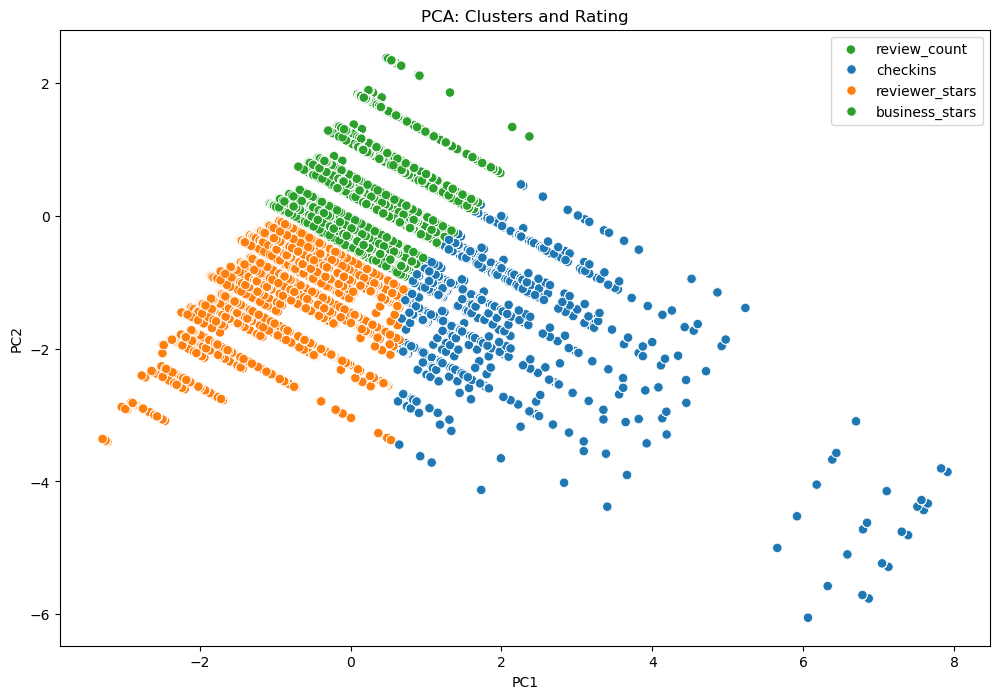

In [53]:
## Step 6: Visualization

def plot_clusters(X, labels, rating, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12, 8))
    kmeans = KMeans(n_clusters=k_cluster, random_state=seed).fit(X)
    data['Cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x=X[:, 0],y=X[:, 1], hue="Cluster", data=data,s=45,legend="full")
    plt.legend(labels=[features[0], features[1], features[2], features[3]])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

print(X_pca)
print(X_pca.shape)
print(data['preference_rating'].shape)

# Visualize PCA results
plot_clusters(X_pca, pca_labels, data['preference_rating'],
              'PCA: Clusters and Rating', 'PC1', 'PC2')


# Your analysis here


**You have been promoted!!**

**You are now one of the consulting company's elite employees! 🎊🎉🥂🥳**

![](https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif?cid=790b76111hlwamin05rcv1ujslgjh5o49haj07h4wpuvwkgz&ep=v1_gifs_search&rid=giphy.gif&ct=g)

### Extra Credit ✨ (7 points total)
The matplotlib and seaborn libraries are great tools for visualizing data.

They are used to create legible and complex graphs that are essential in data interpretation and analysis.

##### ***7.1 Visualize the distribution of each feature in the original dataset for different rating classes (3 pts)***
- **Plot** out histograms for each feature. You can use a for loop.
- Label the **title** of each histogram "Distribution of (Feature Name) by Rating"
- Label the **axes** appropriately and display each histogram.
- Display the **y-axis** using a **logarithmic** scale.

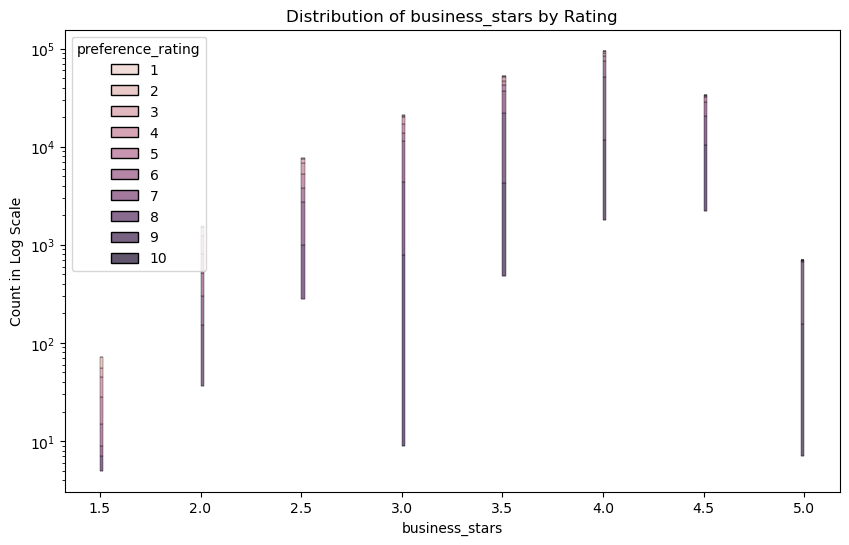

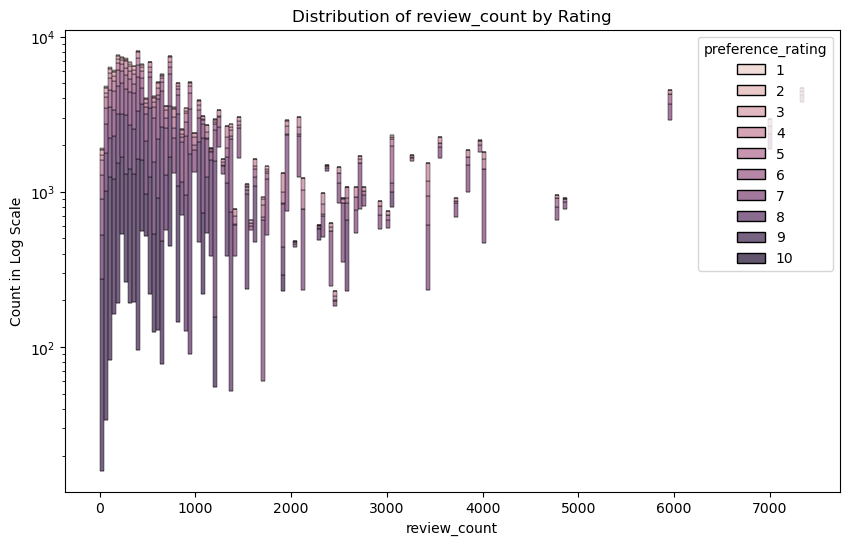

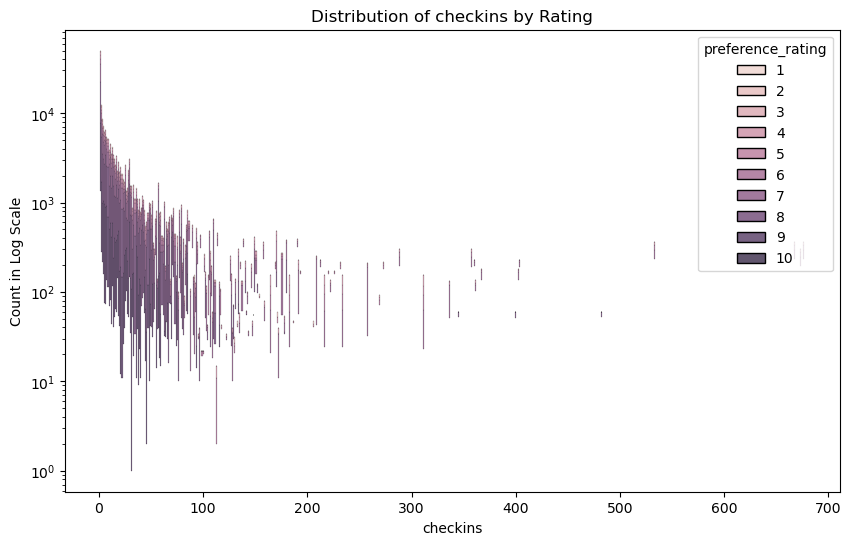

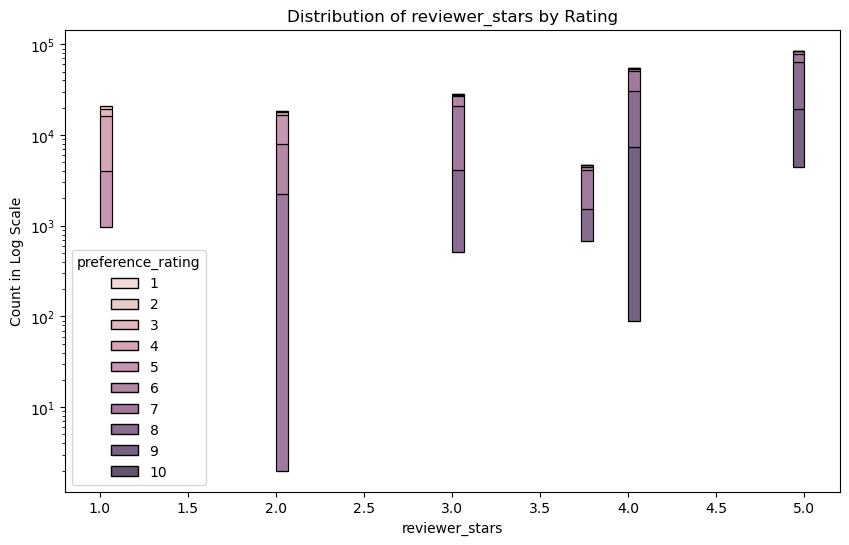

c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


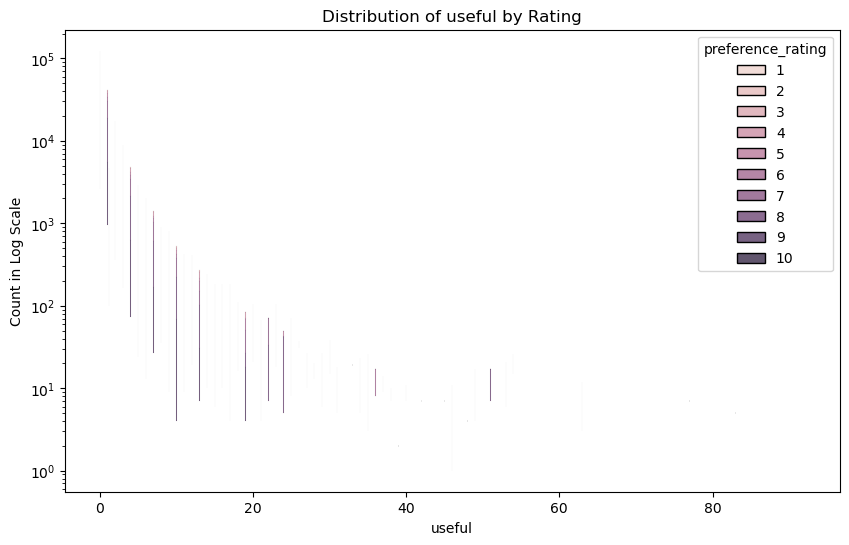

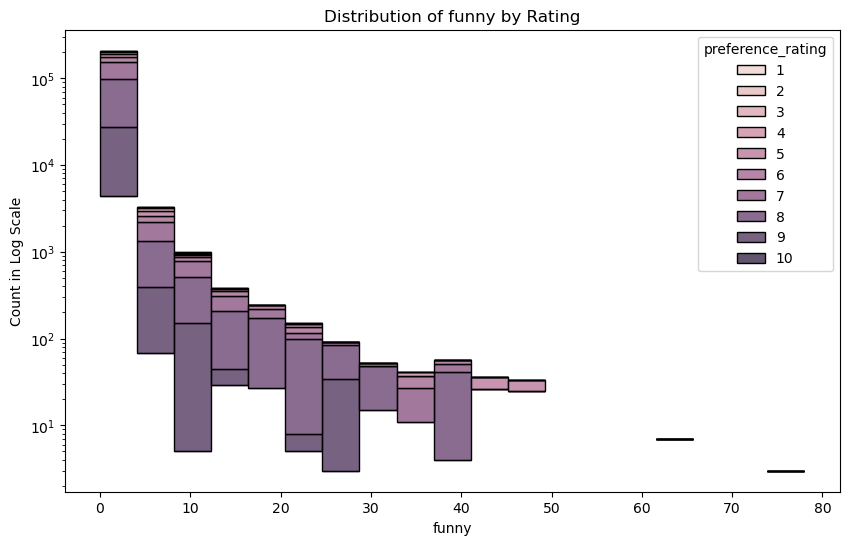

c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


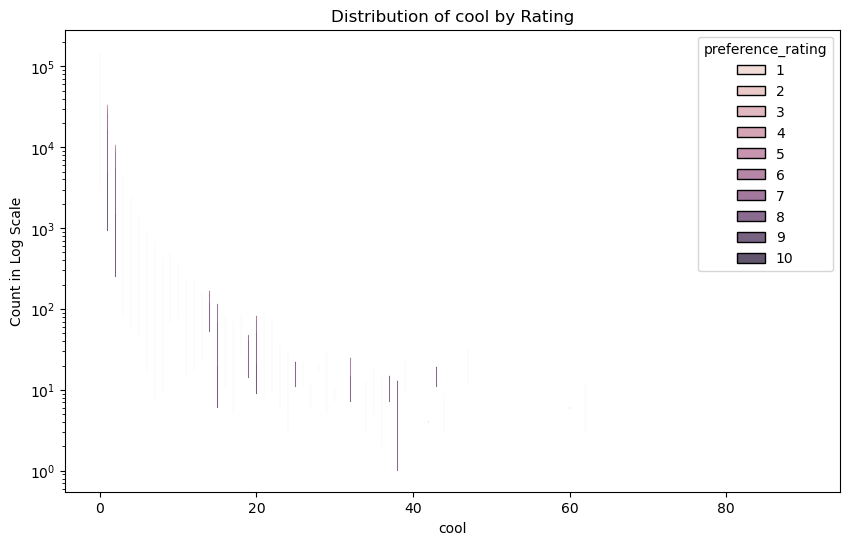

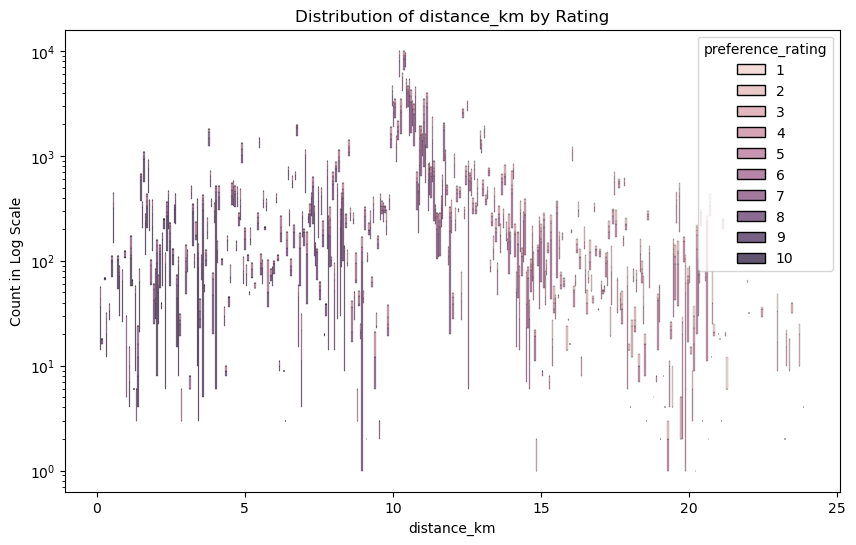

In [64]:
# Dropping text or non-numeric columns
histogram_pd = yelp_data.drop(columns=[
    'business_id', 'name', 'neighborhood', 'latitude', 'longitude','address', 'city', 'state',
    'postal_code', 'categories', 'review_id', 'user_id', 'text'
])

histogram_pd = histogram_pd.iloc[:, list(range(8)) + [-2]]
histogram_pd.head()

# ANSWER STARTING HERE
# Histograms for each feature with rating hue
for feature in histogram_pd.columns[:-1]:  # Exclude 'rating' column
    plt.figure(figsize=(10, 6))

    # Create the histogram
    sns.histplot(data=histogram_pd, x=feature, hue=histogram_pd.columns[-1], multiple="stack", log_scale=(False, True))
    plt.title(f'Distribution of {feature} by Rating')
    plt.xlabel(feature)
    plt.ylabel("Count in Log Scale")
    # Create a custom legend
    plt.show()
# ANSWER ENDS HERE


##### ***7.2 Explore correlations between features and Rating ratings (2 pts)***
- Create a **correlation matrix** based on the correlations between features and rating.
- **Display** the matrix.

In [70]:
# Correlation Matrix
# ANSWER STARTING HERE
corr_matrix = histogram_pd.corr()

# Display the full correlation matrix
display(corr_matrix)

# ANSWER ENDS HERE


,business_stars,review_count,checkins,reviewer_stars,useful,funny,cool,distance_km,preference_rating
business_stars,1.000000,0.081087,0.087193,0.365801,0.013042,0.006011,0.044507,-0.048571,0.346458
review_count,0.081087,1.000000,0.478446,0.040228,0.011061,0.029819,0.020300,0.027895,0.070546
checkins,0.087193,0.478446,1.000000,0.029510,0.009393,0.017838,0.013400,0.014395,0.036650
reviewer_stars,0.365801,0.040228,0.029510,1.000000,-0.037766,-0.043778,0.041587,-0.021182,0.779744
useful,0.013042,0.011061,0.009393,-0.037766,1.000000,0.851142,0.903283,-0.010232,-0.005585
funny,0.006011,0.029819,0.017838,-0.043778,0.851142,1.000000,0.891458,-0.007493,-0.010859
cool,0.044507,0.020300,0.013400,0.041587,0.903283,0.891458,1.000000,-0.013517,0.063850
distance_km,-0.048571,0.027895,0.014395,-0.021182,-0.010232,-0.007493,-0.013517,1.000000,-0.561010
preference_rating,0.346458,0.070546,0.036650,0.779744,-0.005585,-0.010859,0.063850,-0.561010,1.000000


##### **7.3 *Question*: What have you learned from this correlation map? Why? (2 pts)**
ANSWER RIGHT HERE!
From this correlation table, we can see that there are some significant correlations between a couple features. For example, businiess stars and reviewer stars are both correlated with preference_rating, which is not surpirising given the context of yelp reviews. We know they are correlated because their values in the table for each other are high. preference rating and reviewer stars, for example, have a correlation of .78 or 78%. 